In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("SMSSpamCollection", sep='\t',names=['target','text'])

In [5]:
df.shape

(5572, 2)

In [6]:
df.sample(5)

,target,text
721,ham,Oh is it? Send me the address
5000,ham,"Hmph. Go head, big baller."
134,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4899,ham,Oh for fuck's sake she's in like tallahassee
3046,ham,"Hello, yeah i've just got out of the bath and ..."


In [7]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values 
df.duplicated().sum()

403

In [13]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

visualizing the value counts using pie chart 

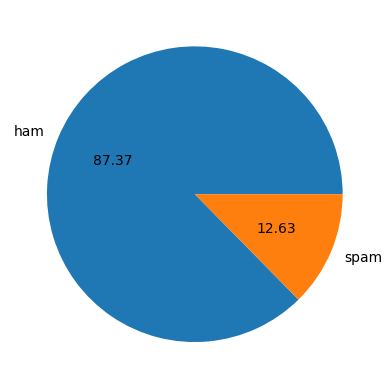

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

we can see that the data is imbalanced

now lets create the columns for what no of characters,words and sentences the msgs/texts contain..and analyze it

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# breaking the texts in terms od its words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df_orig = df[['target','text','num_characters','num_words','num_sentences']]

In [27]:
df_orig = df.head()

In [28]:
df[['text','num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [30]:
df=df[['target','text','num_characters','num_words','num_sentences']]

In [31]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

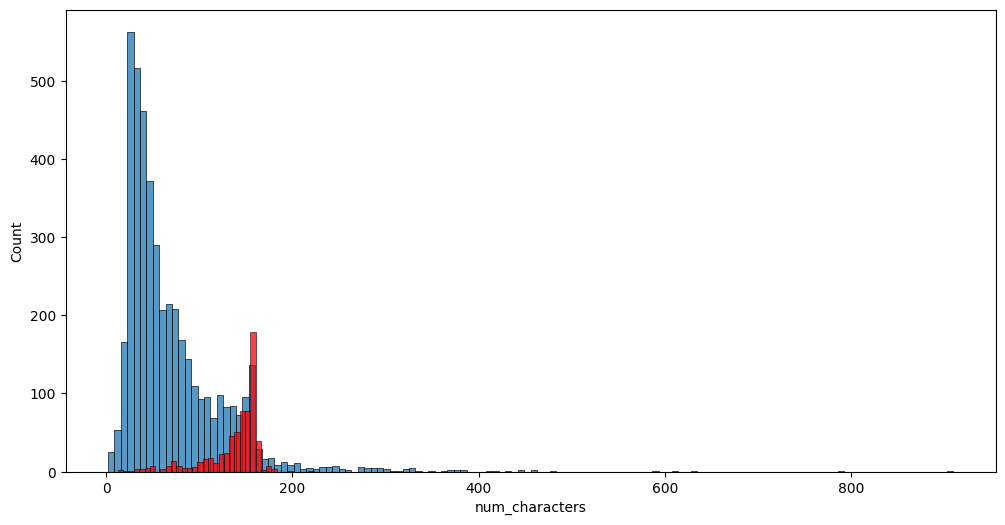

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

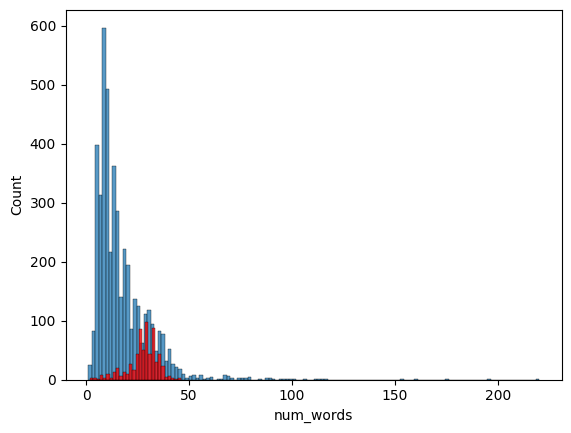

In [35]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

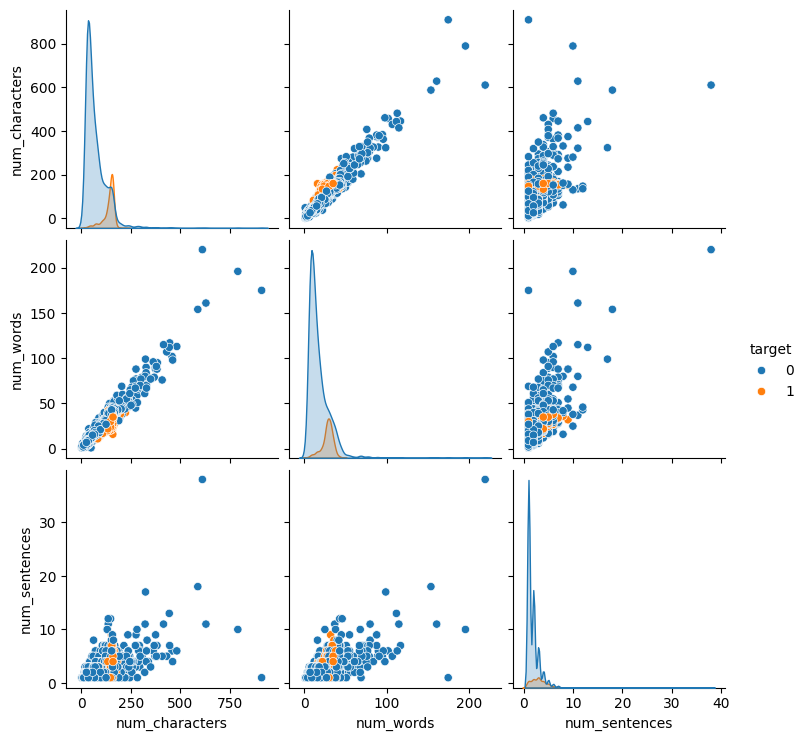

In [36]:
# to view the realtionship between num_words and sentences
sns.pairplot(df,hue='target')

In [37]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.379791,0.260168,0.263826
num_characters,0.379791,1.000000,0.966003,0.622580
num_words,0.260168,0.966003,1.000000,0.679142
num_sentences,0.263826,0.622580,0.679142,1.000000


<Axes: >

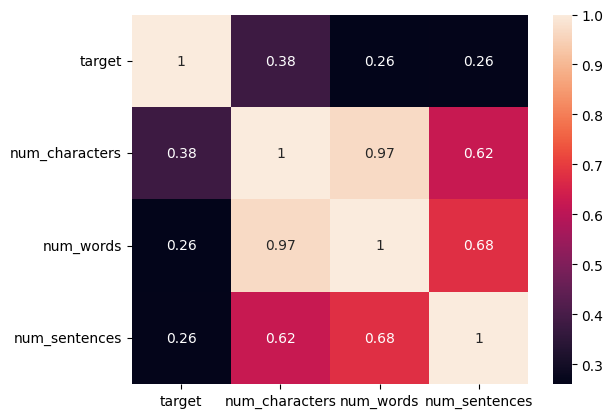

In [38]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

# Text Preprocessing
1. lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [39]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string 

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def tranform_text(text):
    text = text.lower() # lowering
    text = nltk.word_tokenize(text) # tokenization
    
    y = [] # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] # to copy the list..we gotta do cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [44]:
tranform_text("Hello Guys!! Welcome to my youtube channel")

'hello guy welcom youtub channel'

In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [47]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [49]:
df['transformed_text']=df['text'].apply(tranform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
ps = PorterStemmer()

In [52]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\tahur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [55]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

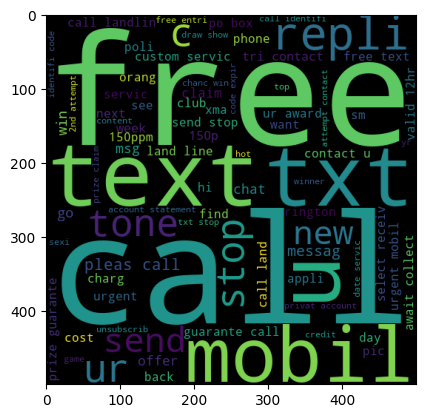

In [56]:
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

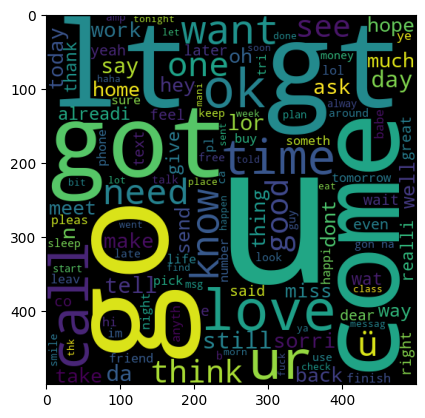

In [58]:
plt.imshow(ham_wc)

In [59]:
# to see the top 50 spam words
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [61]:
len(spam_corpus)

9982

In [62]:
from collections import Counter
Counter(spam_corpus) # counter creates a dictionary with frequency of each word

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 120,
         'ur': 119,
         'mobil': 114,
         'stop': 108,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 61,
         'urgent': 58,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'guarante': 43,
         'custom': 42,
         'messag': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'go': 33,
         'offer': 33,
         'line': 33,
         'want': 32,
         'receiv': 3

In [63]:
Counter(spam_corpus).most_common(30) # gives the most common 30 words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [64]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [65]:
df_spam_counts = (pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','Frequency']))


In [66]:
df_spam_counts

,word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


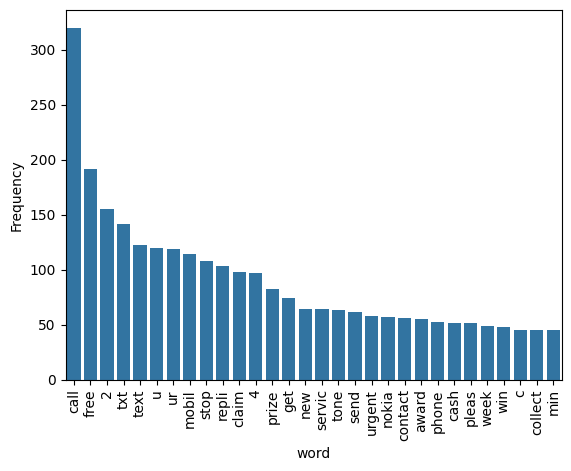

In [67]:
sns.barplot(x='word',y='Frequency',data = df_spam_counts)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

35939

In [70]:
df_ham_counts = (pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','Frequency']))


In [71]:
len(df_ham_counts)

30

In [72]:
df_ham_counts

,word,Frequency
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


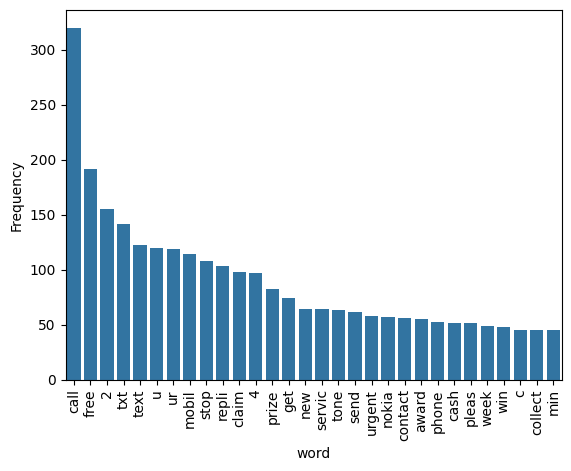

In [73]:
sns.barplot(x='word',y='Frequency',data = df_spam_counts)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''

"from collections import Counter\nsns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()"

# Model Building 
1) We are using Naive Bayes model
2) Coz Naive Bayes performs the best on textual data
3) As we know that ML model need numeical inputs.
4) we have our target as numericals,but we gotta convert the text which is the input into numerical as well(vectors)

In [75]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
# our outputs are in numerical form but not our inputs
# hence we are converting our input that is the text
# we will convert the text into numerical that is vectors
# right now using bag of words 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [114]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [115]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)'

In [116]:
# X = cv.fit_transform(df['transformed_text']).toarray()

In [117]:
X.shape

(5169, 6782)

In [118]:
y = df['target'].values

In [119]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [123]:
gaussian= GaussianNB()
multinomial = MultinomialNB()
bernouli = BernoulliNB() 

In [124]:
gaussian.fit(X_train,y_train)
y_pred1 = gaussian.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[794 114]
 [ 22 104]]
0.47706422018348627


In [125]:
multinomial.fit(X_train,y_train)
y_pred2 = multinomial.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [126]:
bernouli.fit(X_train,y_train)
y_pred3 = bernouli.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


TFIDF with multinomial naive bayes is performing better than all the other naive bayes classifiers
Now we will try with rest of the machine learning models

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [128]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
logistic = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier()
adaboost = AdaBoostClassifier()
bagging = BaggingClassifier()
extratree = ExtraTreesClassifier()
gradient = GradientBoostingClassifier()
xgb = XGBClassifier()

In [129]:
clfs = {'svc': svc,
        'knc':knc,
        'NB':multinomial,
        'DT':dtc,
        'logistic':logistic,
        'rfc':rfc,
        'adaboost':adaboost,
        'bagging':bagging,
        'extratree':extratree,
        'gradient':gradient,
        'xgb':xgb}

In [130]:
def train_classifier(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [131]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for ",name)
    print('Accuracy-',current_accuracy)
    print('Precision-',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  svc
Accuracy- 0.9709864603481625
Precision- 1.0
for  knc
Accuracy- 0.9100580270793037
Precision- 1.0
for  NB
Accuracy- 0.9593810444874274
Precision- 1.0
for  DT
Accuracy- 0.9361702127659575
Precision- 0.8125
for  logistic
Accuracy- 0.9448742746615088
Precision- 0.9259259259259259
for  rfc
Accuracy- 0.965183752417795
Precision- 0.9891304347826086


C:\Users\tahur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  adaboost
Accuracy- 0.9584139264990329
Precision- 0.9108910891089109
for  bagging
Accuracy- 0.9584139264990329
Precision- 0.8807339449541285
for  extratree
Accuracy- 0.971953578336557
Precision- 0.98989898989899
for  gradient
Accuracy- 0.9574468085106383
Precision- 0.9361702127659575
for  xgb
Accuracy- 0.9690522243713733
Precision- 0.9433962264150944


In [132]:
performance_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision
0,svc,0.970986,1.000000
1,knc,0.910058,1.000000
2,NB,0.959381,1.000000
8,extratree,0.971954,0.989899
5,rfc,0.965184,0.989130
10,xgb,0.969052,0.943396
9,gradient,0.957447,0.936170
4,logistic,0.944874,0.925926
6,adaboost,0.958414,0.910891
7,bagging,0.958414,0.880734


In [96]:
performance_df

,Algorithm,Accuracy,Precision
1,knc,0.918762,1.000000
2,NB,0.969052,1.000000
0,svc,0.973888,0.990099
8,extratree,0.978723,0.972727
5,rfc,0.968085,0.969697
10,xgb,0.967118,0.933962
6,adaboost,0.966151,0.933333
9,gradient,0.956480,0.926316
4,logistic,0.946809,0.917647
7,bagging,0.955513,0.877358


In [97]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [98]:
performance_df1

,Algorithm,variable,value
0,knc,Accuracy,0.918762
1,NB,Accuracy,0.969052
2,svc,Accuracy,0.973888
3,extratree,Accuracy,0.978723
4,rfc,Accuracy,0.968085
5,xgb,Accuracy,0.967118
6,adaboost,Accuracy,0.966151
7,gradient,Accuracy,0.956480
8,logistic,Accuracy,0.946809
9,bagging,Accuracy,0.955513


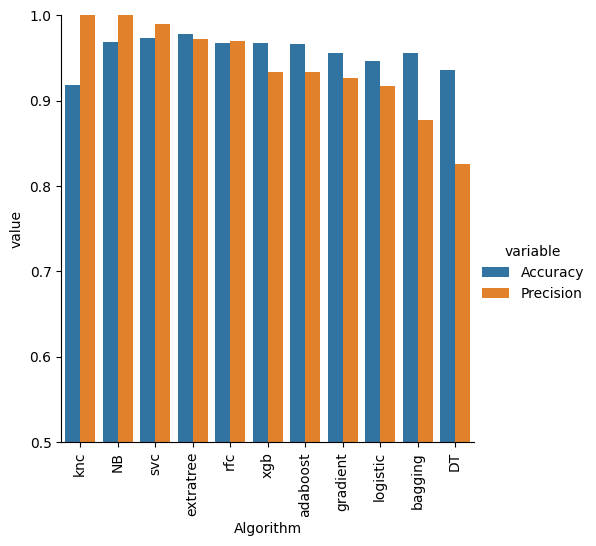

In [99]:
sns.catplot(x='Algorithm', y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
# model improvement
# change the max features parameter of TFIDF
#temp_df = pd.DataFrame() 
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [109]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,knc,0.918762,1.000000
2,NB,0.969052,1.000000
0,svc,0.973888,0.990099
8,extratree,0.978723,0.972727
5,rfc,0.968085,0.969697
10,xgb,0.967118,0.933962
6,adaboost,0.966151,0.933333
9,gradient,0.956480,0.926316
4,logistic,0.946809,0.917647
7,bagging,0.955513,0.877358


In [101]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [102]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [110]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,knc,0.918762,1.000000,0.918762,1.000000
1,NB,0.969052,1.000000,0.969052,1.000000
2,svc,0.973888,0.990099,0.973888,0.990099
3,extratree,0.978723,0.972727,0.978723,0.972727
4,rfc,0.968085,0.969697,0.968085,0.969697
5,xgb,0.967118,0.933962,0.967118,0.933962
6,adaboost,0.966151,0.933333,0.966151,0.933333
7,gradient,0.956480,0.926316,0.956480,0.926316
8,logistic,0.946809,0.917647,0.946809,0.917647
9,bagging,0.955513,0.877358,0.955513,0.877358


In [104]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [106]:

#new_df_scaled

In [111]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [112]:
# new_df_scaled.merge(temp_df,on='Algorithm')


In [315]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [316]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [317]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [318]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9904761904761905


In [319]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [320]:
from sklearn.ensemble import StackingClassifier


In [321]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [322]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9736842105263158


In [134]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))